In [1]:
import time
import geopandas as gpd
import pandas as pd

In [1]:
%%time
run otp_main_single.py --date="2021-12-28" --region="San Francisco-Oakland" --threads=4 --period="ALL" --build_only

['06001', '06075', '06013', '06041', '06081', '06085']
San Francisco-Oakland
-123.061533 -121.165406 36.849152000000004 38.371221999999996
Size of graph is 912042238
Moving file f-9q8-samtrans.zip
Moving file f-9q8y-sfmta.zip
Moving file f-9q8yy-missionbaytma~ca~us.zip
Moving file f-9q8z-goldengateferry.zip
Moving file f-9q8zm-blue~goldfleet.zip
Moving file f-9q8zmw-angelislandtiburonferry.zip
Moving file f-9q8zr-tidelinewatertaxi~ca~us.zip
Moving file f-9q9-acealtamontcorridorexpress.zip
Moving file f-9q9-actransit.zip
Moving file f-9q9-bart.zip
Moving file f-9q9-caltrain.zip
Moving file f-9q9-monterey~salinastransit.zip
Moving file f-9q9-scmtdcom.zip
Moving file f-9q9-vta.zip
Moving file f-9q99-sanbenito~ca~us.zip
Moving file f-9q9h-stanford~marguerite.zip
Moving file f-9q9hu-cityofpaloaltoshuttle.zip
Moving file f-9q9hy-mountainview.zip
Moving file f-9q9j-commute~ca~us.zip
Moving file f-9q9j-dumbartonexpress.zip
Moving file f-9q9jy-unioncitytransit.zip
Moving file f-9q9p-countyconne

In [2]:
%%time
run otp_main_single.py --date="2021-12-28" --region="San Francisco-Oakland" --threads=4 --period="ALL" --run_only

['06001', '06075', '06013', '06041', '06081', '06085']
San Francisco-Oakland
-123.061533 -121.165406 36.849152000000004 38.371221999999996
Wall time: 353 ms


In [4]:
from otp.fare_otp import call_otp, return_itineraries

In [5]:
import config

In [10]:
%%time

p = call_otp()

#needs a bit of time before it can start working
time.sleep(190)


java -Xmx4G -jar C:/Users/ryanm/UCLADrive/205A_Capstone/EquityTool/GitProject/Data/otp/otp-1.4.0-shaded.jar --router graphs-2021-12-28 --graphs C:/Users/ryanm/UCLADrive/205A_Capstone/EquityTool/GitProject/Data/data/San Francisco-Oakland/otp/graphs --server --enableScriptingWebService

Wall time: 3min


In [15]:
test = return_itineraries([-122.389398,37.730825, -122.439019,37.802485, '2021-12-28',8,15])

In [20]:
test

{'requestParameters': {'date': '2021-12-28',
  'mode': 'TRANSIT,WALK',
  'wheelchair': 'False',
  'fromPlace': '37.730825, -122.389398',
  'toPlace': '37.802485, -122.439019',
  'time': '8:15',
  'maxWalkDistance': '5000',
  'clampInitialWait': '0',
  'numItineraries': '1'},
 'plan': {'date': 1640708100000,
  'from': {'name': 'Origin',
   'lon': -122.389398,
   'lat': 37.730825,
   'orig': '',
   'vertexType': 'NORMAL'},
  'to': {'name': 'Destination',
   'lon': -122.439019,
   'lat': 37.802485,
   'orig': '',
   'vertexType': 'NORMAL'},
  'itineraries': [{'duration': 4422,
    'startTime': 1640708337000,
    'endTime': 1640712759000,
    'walkTime': 496,
    'transitTime': 3744,
    'waitingTime': 182,
    'walkDistance': 629.8123383414977,
    'walkLimitExceeded': False,
    'elevationLost': 0.0,
    'elevationGained': 0.0,
    'transfers': 1,
    'fare': {'fare': {'regular': {'currency': {'currency': 'USD',
        'defaultFractionDigits': 2,
        'currencyCode': 'USD',
        '

In [21]:
test['plan']['itineraries']

[{'duration': 4422,
  'startTime': 1640708337000,
  'endTime': 1640712759000,
  'walkTime': 496,
  'transitTime': 3744,
  'waitingTime': 182,
  'walkDistance': 629.8123383414977,
  'walkLimitExceeded': False,
  'elevationLost': 0.0,
  'elevationGained': 0.0,
  'transfers': 1,
  'fare': {'fare': {'regular': {'currency': {'currency': 'USD',
      'defaultFractionDigits': 2,
      'currencyCode': 'USD',
      'symbol': '$'},
     'cents': 300}},
   'details': {'regular': [{'fareId': 'f-9q8y-sfmta:1',
      'price': {'currency': {'currency': 'USD',
        'defaultFractionDigits': 2,
        'currencyCode': 'USD',
        'symbol': '$'},
       'cents': 300},
      'routes': ['f-9q8y-sfmta:17294', 'f-9q8y-sfmta:17306']}]}},
  'legs': [{'startTime': 1640708337000,
    'endTime': 1640708554000,
    'departureDelay': 0,
    'arrivalDelay': 0,
    'realTime': False,
    'distance': 273.86699999999996,
    'pathway': False,
    'mode': 'WALK',
    'route': '',
    'agencyTimeZoneOffset': -28800

In [22]:
test['plan']['itineraries'][0]['duration']

4422

In [4]:
hoods = gpd.read_file('From_SFMTA/hoods')

In [5]:
jobs = gpd.read_file('From_SFMTA/jobs')

In [6]:
hoods.head()

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871)
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355)
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612)
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962)
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789)


In [7]:
jobs.head()

,ID,LABEL,ESSENTIAL,geometry
0,06001404502,"4045.02 (Alameda, CA)",1640,POINT (-122.20262 37.83453)
1,06001404600,"4046 (Alameda, CA)",409,POINT (-122.19122 37.81986)
2,06001404700,"4047 (Alameda, CA)",406,POINT (-122.20699 37.81334)
3,06001404800,"4048 (Alameda, CA)",302,POINT (-122.21320 37.80551)
4,06001404900,"4049 (Alameda, CA)",617,POINT (-122.22151 37.80414)


In [8]:
tracts_min_time = pd.read_csv('From_SFMTA/tracts_min_time.csv')

In [9]:
tracts_min_time.head()

,tract,min_time
0,6013346204,145.27
1,6013345113,136.85
2,6013346201,133.28
3,6013355114,131.88
4,6013345203,131.65


In [10]:
tracts_min_time['ID'] = tracts_min_time.tract.astype(str).str.zfill(11)

In [11]:
jobs = jobs.merge(tracts_min_time, on='ID', how='left')

In [12]:
jobs = jobs[jobs.min_time <= 75]

In [13]:
jobs

,ID,LABEL,ESSENTIAL,geometry,tract,min_time
2,06001404700,"4047 (Alameda, CA)",406,POINT (-122.20699 37.81334),6.001405e+09,65.02
3,06001404800,"4048 (Alameda, CA)",302,POINT (-122.21320 37.80551),6.001405e+09,56.52
4,06001404900,"4049 (Alameda, CA)",617,POINT (-122.22151 37.80414),6.001405e+09,54.55
5,06001405000,"4050 (Alameda, CA)",393,POINT (-122.22764 37.80828),6.001405e+09,56.12
6,06001405100,"4051 (Alameda, CA)",239,POINT (-122.23224 37.81142),6.001405e+09,60.20
...,...,...,...,...,...,...
647,06081607702,"6077.02 (San Mateo, CA)",173,POINT (-122.30273 37.56496),6.081608e+09,57.15
648,06081607800,"6078 (San Mateo, CA)",497,POINT (-122.29489 37.56081),6.081608e+09,63.73
649,06081607900,"6079 (San Mateo, CA)",10856,POINT (-122.28655 37.56143),6.081608e+09,64.07
652,06081608004,"6080.04 (San Mateo, CA)",18615,POINT (-122.27248 37.56518),6.081608e+09,54.67


In [33]:
hoods['lon'] = hoods.geometry.x
hoods['lat'] = hoods.geometry.y

In [14]:
jobs['lon'] = jobs.geometry.x
jobs['lat'] = jobs.geometry.y

In [35]:
hoods_test = hoods.sample(5)
jobs_test = jobs.sample(5)

In [36]:
hoods_test

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat
23,06075012401,"124.01 (San Francisco, CA)",Downtown/Civic Center,Equity Nhood,POINT (-122.41579 37.78305),-122.415789,37.783051
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937
25,06075012501,"125.01 (San Francisco, CA)",Downtown/Civic Center,Equity Nhood,POINT (-122.41098 37.78301),-122.410984,37.783014
42,06075020800,"208 (San Francisco, CA)",Mission,Equity Nhood,POINT (-122.41915 37.75943),-122.419149,37.759433
27,06075015801,"158.01 (San Francisco, CA)",Western Addition,Equity Nhood,POINT (-122.43736 37.78130),-122.437359,37.781305


In [37]:
jobs_test

,ID,LABEL,ESSENTIAL,geometry,tract,min_time,lon,lat
561,06075012100,"121 (San Francisco, CA)",2810,POINT (-122.41189 37.78881),6.075012e+09,3.47,-122.411888,37.788807
580,06075013300,"133 (San Francisco, CA)",2120,POINT (-122.45243 37.78873),6.075013e+09,11.63,-122.452429,37.788731
18,06001406000,"4060 (Alameda, CA)",3953,POINT (-122.25489 37.79190),6.001406e+09,41.68,-122.254887,37.791902
72,06001421200,"4212 (Alameda, CA)",177,POINT (-122.27474 37.89734),6.001421e+09,59.22,-122.274745,37.897339
37,06001407600,"4076 (Alameda, CA)",372,POINT (-122.20320 37.77753),6.001408e+09,55.55,-122.203199,37.777529


In [38]:
%%time

for index, row in hoods_test.iterrows():
    starttime = time.time()
    ox = hoods_test.loc[index,"lon"]
    oy = hoods_test.loc[index,"lat"]
    for index, row in jobs_test.iterrows():
        dx = jobs_test.loc[index,"lon"]
        dy = jobs_test.loc[index,"lat"]
        itin = return_itineraries([ox, oy, dx, dy, '2021-12-28',8,15])
        #print('Itinerary for ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy) + ': ')
        try:
            dur = itin['plan']['itineraries'][0]['duration'] / 60
            dur = round(dur, 2)
            print('Time from ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy) + ' is ' + str(dur) + ' mins')
        except:
            print('Could not determine time from ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy))
    print('Took {} mins'.format(round(time.time()-starttime)/60,2))

Time from -122.41578905099999, 37.78305102899998 to -122.41188806000002, 37.788806575000024 is 13.42 mins
Time from -122.41578905099999, 37.78305102899998 to -122.452429236, 37.78873070499998 is 32.32 mins
Time from -122.41578905099999, 37.78305102899998 to -122.25488729199998, 37.791902375999996 is 46.45 mins
Time from -122.41578905099999, 37.78305102899998 to -122.27474457800002, 37.897338902 is 66.93 mins
Time from -122.41578905099999, 37.78305102899998 to -122.20319907200002, 37.777529386000026 is 60.68 mins
Took 0.11666666666666667 secs
Time from -122.41870558599999, 37.717937286999984 to -122.41188806000002, 37.788806575000024 is 46.97 mins
Time from -122.41870558599999, 37.717937286999984 to -122.452429236, 37.78873070499998 is 74.65 mins
Time from -122.41870558599999, 37.717937286999984 to -122.25488729199998, 37.791902375999996 is 66.17 mins
Time from -122.41870558599999, 37.717937286999984 to -122.27474457800002, 37.897338902 is 79.93 mins
Time from -122.41870558599999, 37.71

In [39]:
%%time

times_test = hoods_test.copy()

for index, row in times_test.iterrows():
    ox = times_test.loc[index,"lon"]
    oy = times_test.loc[index,"lat"]
    for index2, row in jobs_test.iterrows():
        dx = jobs_test.loc[index2,"lon"]
        dy = jobs_test.loc[index2,"lat"]
        itin = return_itineraries([ox, oy, dx, dy, '2021-12-28',8,15])
        #print('Itinerary for ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy) + ': ')
        col = jobs_test.loc[index2,"ID"]
        try:
            dur = itin['plan']['itineraries'][0]['duration'] / 60
            dur = round(dur, 2)
            times_test.loc[index,col] = dur
        except:
            print('Could not determine time from ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy))

Wall time: 20.2 s


In [40]:
times_test

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,06075012100,06075013300,06001406000,06001421200,06001407600
23,06075012401,"124.01 (San Francisco, CA)",Downtown/Civic Center,Equity Nhood,POINT (-122.41579 37.78305),-122.415789,37.783051,13.42,32.32,46.45,66.93,60.68
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,46.97,74.65,66.17,79.93,84.00
25,06075012501,"125.01 (San Francisco, CA)",Downtown/Civic Center,Equity Nhood,POINT (-122.41098 37.78301),-122.410984,37.783014,8.45,34.90,41.68,63.53,60.20
42,06075020800,"208 (San Francisco, CA)",Mission,Equity Nhood,POINT (-122.41915 37.75943),-122.419149,37.759433,25.10,47.10,42.63,64.88,56.15
27,06075015801,"158.01 (San Francisco, CA)",Western Addition,Equity Nhood,POINT (-122.43736 37.78130),-122.437359,37.781305,19.65,19.85,67.45,76.95,85.28


In [42]:
%%time

times = hoods.copy()

for index, row in times.iterrows():
    starttime = time.time()
    ox = times.loc[index,"lon"]
    oy = times.loc[index,"lat"]
    for index2, row in jobs.iterrows():
        dx = jobs.loc[index2,"lon"]
        dy = jobs.loc[index2,"lat"]
        itin = return_itineraries([ox, oy, dx, dy, '2021-12-28',8,15])
        #print('Itinerary for ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy) + ': ')
        col = jobs.loc[index2,"ID"]
        try:
            dur = itin['plan']['itineraries'][0]['duration'] / 60
            dur = round(dur, 2)
            times.loc[index,col] = dur
        except:
            print('Could not determine time from ' + str(ox) + ', ' + str(oy) + ' to ' + str(dx) + ', ' + str(dy))
    print('Took ' + str(round((time.time()-starttime)/60,2)) + ' secs to calculate times for ' + str(times.loc[index,"ID"]))

Could not determine time from -122.422424422, 37.728713475999996 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.422424422, 37.728713475999996 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.422424422, 37.728713475999996 to -122.378412954, 37.62075528700001
Could not determine time from -122.422424422, 37.728713475999996 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.422424422, 37.728713475999996 to -122.367775263, 37.722506640000006
Could not determine time from -122.422424422, 37.728713475999996 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.422424422, 37.728713475999996 to -122.422424422, 37.728713475999996
Could not determine time from -122.422424422, 37.728713475999996 to -122.483901366, 37.65946133599999
Could not determine time from -122.422424422, 37.728713475999996 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.422424422, 37.7287

Could not determine time from -122.43953613399998, 37.713868667999975 to -122.483901366, 37.65946133599999
Could not determine time from -122.43953613399998, 37.713868667999975 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.43953613399998, 37.713868667999975 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.43953613399998, 37.713868667999975 to -122.26189401300002, 37.561236753
Took 4.8 secs to calculate times for 06075026301
Could not determine time from -122.443466264, 37.70966451800001 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.443466264, 37.70966451800001 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.443466264, 37.70966451800001 to -122.378412954, 37.62075528700001
Could not determine time from -122.443466264, 37.70966451800001 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.443466264, 37.70966451800001 to -122.367775263, 37.72250

Could not determine time from -122.40616449999999, 37.79335057100002 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.367775263, 37.722506640000006
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.40616449999999, 37.79335057100002
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.483901366, 37.65946133599999
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.40616449999999, 37.79335057100002 to -122.26189401300002, 37.561236753
Took 6.85 secs to calculate times for 06075011800
Could not determine time from -122.422491477, 37.782339143 to -122.2759445

Could not determine time from -122.41635350000001, 37.785846436999975 to -122.26189401300002, 37.561236753
Took 7.34 secs to calculate times for 06075012201
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.378412954, 37.62075528700001
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.367775263, 37.722506640000006
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.41964430000002, 37.785412199999996 to -122.41964430000002, 37.785412199999996
Could not determine time from -122.41964430000002, 37.785412199999

Could not determine time from -122.41259543400002, 37.783932986000025 to -122.367775263, 37.722506640000006
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.41259543400002, 37.783932986000025
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.483901366, 37.65946133599999
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.41259543400002, 37.783932986000025 to -122.26189401300002, 37.561236753
Took 7.05 secs to calculate times for 06075012502
Could not determine time from -122.437358512, 37.781304517000024 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.437358512, 37.781304517000024 to -

Could not determine time from -122.42492997900001, 37.77354639800001 to -122.42492997900001, 37.77354639800001
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.378412954, 37.62075528700001
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.367775263, 37.722506640000006
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.483901366, 37.65946133599999
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.42492997900001, 37.77354639800001 to -122.50731275999999, 37.591297036000014
Could not det

Could not determine time from -122.42000234099999, 37.76860852599998 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.42000234099999, 37.76860852599998 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.42000234099999, 37.76860852599998 to -122.26189401300002, 37.561236753
Took 7.71 secs to calculate times for 06075020100
Could not determine time from -122.424177697, 37.767124439999975 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.424177697, 37.767124439999975 to -122.424177697, 37.767124439999975
Could not determine time from -122.424177697, 37.767124439999975 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.424177697, 37.767124439999975 to -122.378412954, 37.62075528700001
Could not determine time from -122.424177697, 37.767124439999975 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.424177697, 37.767124439999975 to -122.367775263, 37.722506

Could not determine time from -122.40623362999997, 37.758915151999986 to -122.367775263, 37.722506640000006
Could not determine time from -122.40623362999997, 37.758915151999986 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.40623362999997, 37.758915151999986 to -122.483901366, 37.65946133599999
Could not determine time from -122.40623362999997, 37.758915151999986 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.40623362999997, 37.758915151999986 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.40623362999997, 37.758915151999986 to -122.26189401300002, 37.561236753
Took 4.07 secs to calculate times for 06075022802
Could not determine time from -122.41208423199998, 37.755836816 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.41208423199998, 37.755836816 to -122.41208423199998, 37.755836816
Could not determine time from -122.41208423199998, 37.755836816 to -122.5010962090

Could not determine time from -122.384490067, 37.73448949499999 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.384490067, 37.73448949499999 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.384490067, 37.73448949499999 to -122.483901366, 37.65946133599999
Could not determine time from -122.384490067, 37.73448949499999 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.384490067, 37.73448949499999 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.384490067, 37.73448949499999 to -122.26189401300002, 37.561236753
Took 3.63 secs to calculate times for 06075023102
Could not determine time from -122.37876555100001, 37.735123036999994 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.37876555100001, 37.735123036999994 to -122.37876555100001, 37.735123036999994
Could not determine time from -122.37876555100001, 37.735123036999994 to -122.50109620900002, 37

Could not determine time from -122.367775263, 37.722506640000006 to -122.24338784600002, 37.80527697399998
Could not determine time from -122.367775263, 37.722506640000006 to -122.25135580900002, 37.802075721999984
Could not determine time from -122.367775263, 37.722506640000006 to -122.254313798, 37.798507528000016
Could not determine time from -122.367775263, 37.722506640000006 to -122.24945620800003, 37.796538425999984
Could not determine time from -122.367775263, 37.722506640000006 to -122.24610059700001, 37.79333195200002
Could not determine time from -122.367775263, 37.722506640000006 to -122.24327907899999, 37.798282141000016
Could not determine time from -122.367775263, 37.722506640000006 to -122.237272572, 37.800801879000005
Could not determine time from -122.367775263, 37.722506640000006 to -122.22967372099998, 37.79823074199999
Could not determine time from -122.367775263, 37.722506640000006 to -122.233098542, 37.79394517100002
Could not determine time from -122.367775263, 3

Could not determine time from -122.367775263, 37.722506640000006 to -122.25997900499999, 37.86678747299999
Could not determine time from -122.367775263, 37.722506640000006 to -122.27803947299998, 38.00952032499998
Could not determine time from -122.367775263, 37.722506640000006 to -122.31526820200003, 37.94571941800001
Could not determine time from -122.367775263, 37.722506640000006 to -122.345943519, 37.976138934999994
Could not determine time from -122.367775263, 37.722506640000006 to -122.35092253200003, 37.96899248400001
Could not determine time from -122.367775263, 37.722506640000006 to -122.330249321, 37.97258510099999
Could not determine time from -122.367775263, 37.722506640000006 to -122.33555044100001, 37.96602784200002
Could not determine time from -122.367775263, 37.722506640000006 to -122.352500593, 37.95427529400001
Could not determine time from -122.367775263, 37.722506640000006 to -122.35209920300002, 37.96105530900002
Could not determine time from -122.367775263, 37.72

Could not determine time from -122.367775263, 37.722506640000006 to -122.44778828400001, 37.77419570500001
Could not determine time from -122.367775263, 37.722506640000006 to -122.44745381899997, 37.77049415800002
Could not determine time from -122.367775263, 37.722506640000006 to -122.43773570799999, 37.77034811599998
Could not determine time from -122.367775263, 37.722506640000006 to -122.429013312, 37.77133088300002
Could not determine time from -122.367775263, 37.722506640000006 to -122.42492997900001, 37.77354639800001
Could not determine time from -122.367775263, 37.722506640000006 to -122.43246899799999, 37.76709806500003
Could not determine time from -122.367775263, 37.722506640000006 to -122.439497222, 37.764887312999974
Could not determine time from -122.367775263, 37.722506640000006 to -122.44608364700002, 37.76572457399999
Could not determine time from -122.367775263, 37.722506640000006 to -122.450475353, 37.76543538200002
Could not determine time from -122.367775263, 37.72

Could not determine time from -122.367775263, 37.722506640000006 to -122.24150263500002, 37.733711934999974
Could not determine time from -122.367775263, 37.722506640000006 to -122.24898759899997, 37.743128092999996
Could not determine time from -122.367775263, 37.722506640000006 to -122.25061994200001, 37.758910189999995
Could not determine time from -122.367775263, 37.722506640000006 to -122.25997005699998, 37.75964929899999
Could not determine time from -122.367775263, 37.722506640000006 to -122.27232890900001, 37.763223505999974
Could not determine time from -122.367775263, 37.722506640000006 to -122.30655887699999, 37.78315855300002
Could not determine time from -122.367775263, 37.722506640000006 to -122.09696418099998, 37.70417602499998
Could not determine time from -122.367775263, 37.722506640000006 to -122.14660488499999, 37.73604957700002
Could not determine time from -122.367775263, 37.722506640000006 to -122.156245248, 37.733054439
Could not determine time from -122.36777526

Could not determine time from -122.367775263, 37.722506640000006 to -122.28887839999999, 37.53738865899999
Could not determine time from -122.367775263, 37.722506640000006 to -122.28253535300001, 37.531730399000025
Could not determine time from -122.367775263, 37.722506640000006 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.367775263, 37.722506640000006 to -122.395555838, 37.651264759000014
Could not determine time from -122.367775263, 37.722506640000006 to -122.42574872699998, 37.63317444799998
Could not determine time from -122.367775263, 37.722506640000006 to -122.378412954, 37.62075528700001
Could not determine time from -122.367775263, 37.722506640000006 to -122.41010237299997, 37.623634950999985
Could not determine time from -122.367775263, 37.722506640000006 to -122.43578094899999, 37.644482349999976
Could not determine time from -122.367775263, 37.722506640000006 to -122.46103090499997, 37.64622457600001
Could not determine time from -122.36777526

Could not determine time from -122.367775263, 37.722506640000006 to -122.443466264, 37.70966451800001
Could not determine time from -122.367775263, 37.722506640000006 to -122.41128334500002, 37.71352506900001
Could not determine time from -122.367775263, 37.722506640000006 to -122.40329762099998, 37.71648846400001
Could not determine time from -122.367775263, 37.722506640000006 to -122.40691277899998, 37.71119164800001
Could not determine time from -122.367775263, 37.722506640000006 to -122.41529326699998, 37.70965080100001
Could not determine time from -122.367775263, 37.722506640000006 to -122.45973338099998, 37.764237561000016
Could not determine time from -122.367775263, 37.722506640000006 to -122.45691484000002, 37.75836104899997
Could not determine time from -122.367775263, 37.722506640000006 to -122.47378404099999, 37.762813591
Could not determine time from -122.367775263, 37.722506640000006 to -122.46732727300002, 37.76308678800001
Could not determine time from -122.367775263, 

Could not determine time from -122.367775263, 37.722506640000006 to -122.45642689900001, 37.778247335
Could not determine time from -122.367775263, 37.722506640000006 to -122.48947067900002, 37.69224791300002
Could not determine time from -122.367775263, 37.722506640000006 to -122.47844828199999, 37.693238398999995
Could not determine time from -122.367775263, 37.722506640000006 to -122.46548224999998, 37.687874008999984
Could not determine time from -122.367775263, 37.722506640000006 to -122.47881223299999, 37.681068933999995
Could not determine time from -122.367775263, 37.722506640000006 to -122.48563656900001, 37.675075531000005
Could not determine time from -122.367775263, 37.722506640000006 to -122.478364774, 37.66917983600001
Could not determine time from -122.367775263, 37.722506640000006 to -122.44971308800001, 37.678254959000014
Could not determine time from -122.367775263, 37.722506640000006 to -122.460994922, 37.655479852999974
Could not determine time from -122.367775263, 

Could not determine time from -122.41128334500002, 37.71352506900001 to -122.27594450800001, 38.026414568999996
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.50109620900002, 37.54057987499999
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.378412954, 37.62075528700001
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.48584657200001, 37.63636036700001
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.367775263, 37.722506640000006
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.49205628099998, 37.65313434699999
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.41128334500002, 37.71352506900001
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.483901366, 37.65946133599999
Could not determine time from -122.41128334500002, 37.71352506900001 to -122.48432533800002, 37.616336279999985
Could not det

Could not determine time from -122.369821779, 37.821666556000025 to -122.483901366, 37.65946133599999
Could not determine time from -122.369821779, 37.821666556000025 to -122.48432533800002, 37.616336279999985
Could not determine time from -122.369821779, 37.821666556000025 to -122.50731275999999, 37.591297036000014
Could not determine time from -122.369821779, 37.821666556000025 to -122.26189401300002, 37.561236753
Took 2.22 secs to calculate times for 06075017902
Wall time: 20h 50min 50s


In [55]:
times

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,06001404700,06001404800,06001404900,...,06081607500,06081607600,06081607701,06081607702,06081607800,06081607900,06081608004,06081608100,06075025600,06075980600
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871),-122.422424,37.728713,71.32,67.62,60.85,...,77.50,72.55,80.17,76.53,83.12,75.00,65.60,85.55,NaN,NaN
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355),-122.432243,37.723550,76.20,67.77,62.35,...,75.85,70.90,78.52,74.88,81.47,73.35,63.95,83.90,15.58,NaN
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612),-122.426282,37.726120,88.03,89.45,86.10,...,97.83,88.97,103.43,107.83,90.60,77.70,68.30,88.25,6.38,NaN
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962),-122.428773,37.719622,68.92,66.02,60.60,...,74.10,69.15,76.77,73.13,79.72,71.60,62.20,82.15,9.30,NaN
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789),-122.435703,37.717892,91.67,84.35,77.73,...,77.50,72.55,80.17,76.53,83.12,77.33,67.93,87.88,18.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,06075026403,"264.03 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.40691 37.71119),-122.406913,37.711192,87.70,80.40,77.23,...,58.12,53.17,60.78,57.15,63.73,65.62,56.22,78.28,21.87,NaN
66,06075026404,"264.04 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41529 37.70965),-122.415293,37.709651,87.93,80.63,77.47,...,76.10,71.15,78.77,75.13,81.72,83.60,74.20,96.27,34.95,NaN
67,06075060502,"605.02 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41991 37.71100),-122.419913,37.711003,82.97,85.67,81.60,...,79.35,85.28,82.02,78.38,84.97,75.65,66.25,99.52,35.05,NaN
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,87.10,79.80,75.73,...,74.15,69.20,76.82,73.18,79.77,79.78,70.38,94.32,22.43,NaN


In [56]:
jobs

,ID,LABEL,ESSENTIAL,geometry,tract,min_time,lon,lat
2,06001404700,"4047 (Alameda, CA)",406,POINT (-122.20699 37.81334),6.001405e+09,65.02,-122.206993,37.813343
3,06001404800,"4048 (Alameda, CA)",302,POINT (-122.21320 37.80551),6.001405e+09,56.52,-122.213196,37.805508
4,06001404900,"4049 (Alameda, CA)",617,POINT (-122.22151 37.80414),6.001405e+09,54.55,-122.221506,37.804142
5,06001405000,"4050 (Alameda, CA)",393,POINT (-122.22764 37.80828),6.001405e+09,56.12,-122.227644,37.808276
6,06001405100,"4051 (Alameda, CA)",239,POINT (-122.23224 37.81142),6.001405e+09,60.20,-122.232237,37.811425
...,...,...,...,...,...,...,...,...
647,06081607702,"6077.02 (San Mateo, CA)",173,POINT (-122.30273 37.56496),6.081608e+09,57.15,-122.302730,37.564963
648,06081607800,"6078 (San Mateo, CA)",497,POINT (-122.29489 37.56081),6.081608e+09,63.73,-122.294887,37.560806
649,06081607900,"6079 (San Mateo, CA)",10856,POINT (-122.28655 37.56143),6.081608e+09,64.07,-122.286545,37.561431
652,06081608004,"6080.04 (San Mateo, CA)",18615,POINT (-122.27248 37.56518),6.081608e+09,54.67,-122.272482,37.565179


In [57]:
times.to_csv('From_SFMTA/jobs_by_tract.csv')

In [58]:
job_sum = hoods.copy()

In [59]:
job_sum['jobs30'] = 0
job_sum['jobs45'] = 0
job_sum['jobs60'] = 0

In [60]:
%%time

for index, row in job_sum.iterrows():
    for index2, row2 in jobs.iterrows():
        try:
            if times.loc[index,row2.ID] <= 30:
                #print(row2.ID)
                job_sum.loc[index, 'jobs30'] = job_sum.loc[index, 'jobs30'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass
        
        try:
            if times.loc[index,row2.ID] <= 45:
                #print(row2.ID)
                job_sum.loc[index, 'jobs45'] = job_sum.loc[index, 'jobs45'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass
        
        try:
            if times.loc[index,row2.ID] <= 60:
                #print(row2.ID)
                job_sum.loc[index, 'jobs60'] = job_sum.loc[index, 'jobs60'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass

Wall time: 14 s


In [61]:
job_sum

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,jobs30,jobs45,jobs60
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871),-122.422424,37.728713,86531,627316,909368
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355),-122.432243,37.723550,62637,602993,838921
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612),-122.426282,37.726120,66612,368796,776324
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962),-122.428773,37.719622,84449,411744,896573
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789),-122.435703,37.717892,37005,245270,834883
...,...,...,...,...,...,...,...,...,...,...
65,06075026403,"264.03 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.40691 37.71119),-122.406913,37.711192,64386,615662,806503
66,06075026404,"264.04 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41529 37.70965),-122.415293,37.709651,25971,277653,696239
67,06075060502,"605.02 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41991 37.71100),-122.419913,37.711003,31814,298031,775197
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,56052,472288,766051


In [62]:
job_sum.to_csv('From_SFMTA/job_sums_by_tract_small.csv')

<AxesSubplot:>

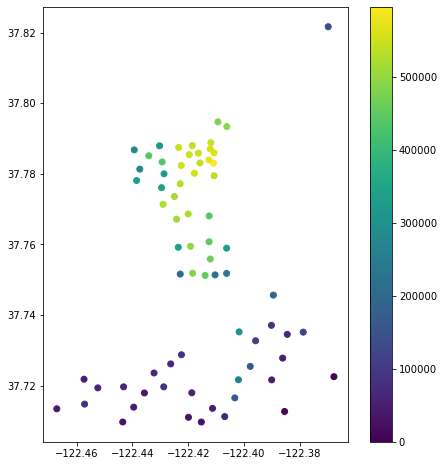

In [64]:
job_sum.plot(figsize = (8,8), column='jobs30', legend = True)

In [3]:
jobs

,ID,LABEL,ESSENTIAL,geometry
0,06001404502,"4045.02 (Alameda, CA)",1640,POINT (-122.20262 37.83453)
1,06001404600,"4046 (Alameda, CA)",409,POINT (-122.19122 37.81986)
2,06001404700,"4047 (Alameda, CA)",406,POINT (-122.20699 37.81334)
3,06001404800,"4048 (Alameda, CA)",302,POINT (-122.21320 37.80551)
4,06001404900,"4049 (Alameda, CA)",617,POINT (-122.22151 37.80414)
...,...,...,...,...
653,06081608013,"6080.13 (San Mateo, CA)",66,POINT (-122.26143 37.54062)
654,06081608023,"6080.23 (San Mateo, CA)",434,POINT (-122.27056 37.54143)
655,06081608100,"6081 (San Mateo, CA)",252,POINT (-122.26189 37.56124)
656,06081608200,"6082 (San Mateo, CA)",499,POINT (-122.25939 37.56746)


In [15]:
pointset = jobs[['lat','lon','ESSENTIAL', 'ID']].copy().reset_index(drop=True)

In [16]:
pointset

,lat,lon,ESSENTIAL,ID
0,37.813343,-122.206993,406,06001404700
1,37.805508,-122.213196,302,06001404800
2,37.804142,-122.221506,617,06001404900
3,37.808276,-122.227644,393,06001405000
4,37.811425,-122.232237,239,06001405100
...,...,...,...,...
529,37.564963,-122.302730,173,06081607702
530,37.560806,-122.294887,497,06081607800
531,37.561431,-122.286545,10856,06081607900
532,37.565179,-122.272482,18615,06081608004


In [17]:
pointset.to_csv('From_SFMTA/destination_pointset.csv')